# k-Nearest Neighbors

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
!pip install mglearn
import mglearn

## k-Nearest Neigbors Classification
#### class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

In [2]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

from sklearn.datasets import load_iris
iris_dataset = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset.data, iris_dataset.target, stratify=iris_dataset.target, random_state=66)

# k = 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_train, y_train)))

knn score: 0.9732142857142857


### Comparing different values for k

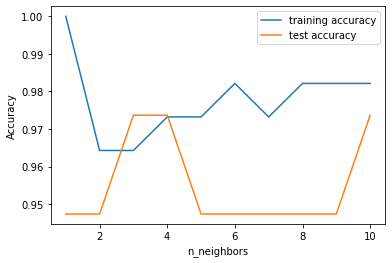

In [3]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Manhattan Distance (versus the default Minkowski distance tuned act like Euclidean Distance)

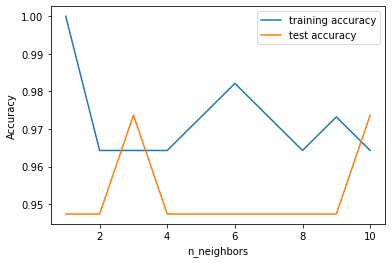

In [4]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric='manhattan')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Weighted with inverse of distance (versus the default uniform weighting)

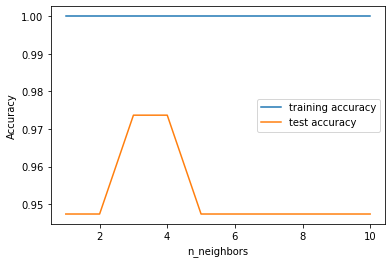

In [5]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,weights='distance')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Experimenting with changing the algorithm to compute nearest neighbors (‘ball_tree’, ‘kd_tree’ ,‘brute’,'auto)

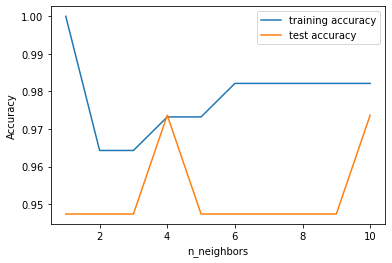

In [6]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm="brute")
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Cross Validation

In [7]:
# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[0.91304348 0.95652174 0.90909091 0.90909091 0.95454545]
cv_scores mean:
0.9284584980237154


### Grid Search

In [8]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()

#dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 25)}

#grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [9]:
#best performing k (on training set)
knn_gscv.best_params_

{'n_neighbors': 9}

In [10]:
#accuracy of best performing k
knn_gscv.best_score_

0.9731225296442687

In [11]:
# accuracy of k = 4 on testing data 
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_test, y_test)))

knn score: 0.9736842105263158


In [12]:
# accuracy of k = 9 on testing data 
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_test, y_test)))

knn score: 0.9473684210526315


### Metrics other than accuracy

In [13]:
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn4.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[13  0  0]
 [ 0 11  1]
 [ 0  0 13]]


In [14]:
knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn9.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[13  0  0]
 [ 0 10  2]
 [ 0  0 13]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn4.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        13
     class 2       1.00      0.92      0.96        12
     class 3       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn9.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        13
     class 2       1.00      0.83      0.91        12
     class 3       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



## k-Nearest Neigbors Regression

#### class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

In [17]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Data shape: (506, 13)


In [18]:
from sklearn.neighbors import KNeighborsRegressor
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### Evaluation Metrics

In [19]:
#https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.61


In [20]:
from sklearn.metrics import mean_squared_error
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, reg.predict(X_test))))

Test set RMSE: 31.77


In [21]:
from sklearn.metrics import mean_absolute_error
print("Test set MSE: {:.2f}".format(mean_absolute_error(y_test, reg.predict(X_test))))

Test set MSE: 3.51
